In [1]:
import pandas as pd

df = pd.read_csv("steam_games_dataset_kaggle.csv")

#variables we will use
df = df[["name", "desc_snippet","genre"]]

#delete missing values
df = pd.DataFrame(df.dropna())

df = df.head(3000)
df.head(10)

,name,desc_snippet,genre
0,DOOM,Now includes all three premium DLC packs (Unto...,Action
1,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Action,Adventure,Massively Multiplayer"
2,BATTLETECH,Take command of your own mercenary outfit of '...,"Action,Adventure,Strategy"
3,DayZ,The post-soviet country of Chernarus is struck...,"Action,Adventure,Massively Multiplayer"
4,EVE Online,EVE Online is a community-driven spaceship MMO...,"Action,Free to Play,Massively Multiplayer,RPG,..."
5,Grand Theft Auto V: Premium Online Edition,Grand Theft Auto V: Premium Online Edition bundle,"Action,Adventure"
6,Devil May Cry 5,"The ultimate Devil Hunter is back in style, in...",Action
7,Human: Fall Flat,Human: Fall Flat is a quirky open-ended physic...,"Adventure,Indie"
8,They Are Billions,They Are Billions is a Steampunk strategy game...,"Strategy,Early Access"
9,Warhammer: Chaosbane,In a world ravaged by war and dominated by mag...,"Action,Adventure,RPG"


In [2]:
# Extract unique genres from the Kaggle dataset
unique_genres = set([genre for genres in df['genre'] for genre in genres.split(',')])
unique_genres_list = list(unique_genres)
# Print the unique genres from the Kaggle dataset
print(unique_genres)

{'Action', 'Indie', 'Valve', 'Free to Play', 'Photo Editing', 'Strategy', 'Animation & Modeling', 'Sports', 'Casual', 'Nudity', 'Early Access', 'Violent', 'Web Publishing', 'Gore', 'Massively Multiplayer', 'Utilities', 'Video Production', 'Game Development', 'Accounting', 'Adventure', 'Education', 'Racing', 'Movie', 'Sexual Content', 'Design & Illustration', 'Simulation', 'Software Training', 'Audio Production', 'RPG'}


In [3]:
# Create binary columns for each unique genre
for genre in unique_genres:
    df[genre] = df['genre'].apply(lambda x: int(genre in x))

# Print the updated dataset
df.head()

,name,desc_snippet,genre,Action,Indie,Valve,Free to Play,Photo Editing,Strategy,Animation & Modeling,...,Adventure,Education,Racing,Movie,Sexual Content,Design & Illustration,Simulation,Software Training,Audio Production,RPG
0,DOOM,Now includes all three premium DLC packs (Unto...,Action,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Action,Adventure,Massively Multiplayer",1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,BATTLETECH,Take command of your own mercenary outfit of '...,"Action,Adventure,Strategy",1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,DayZ,The post-soviet country of Chernarus is struck...,"Action,Adventure,Massively Multiplayer",1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,EVE Online,EVE Online is a community-driven spaceship MMO...,"Action,Free to Play,Massively Multiplayer,RPG,...",1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# Download NLTK resources (required for tokenization and stopwords)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Stopword removal and lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    # Remove special characters and punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Join tokens back into text
    processed_text = ' '.join(tokens)
    
    return processed_text

# Apply preprocessing to the 'description' column
df['processed_desc_snippet'] = df['desc_snippet'].apply(preprocess_text)

# Save the updated DataFrame to a new CSV file
df.to_csv('preprocessed_kaggle_multi_labels2.csv', index=False)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
[nltk_data] Downloading package punkt to /home/altant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/altant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/altant/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("preprocessed_kaggle_multi_labels2.csv")

X = df['processed_desc_snippet']  # Input features (preprocessed text)
y = df.iloc[:, 3:-1]  # Output labels (binary genre columns)

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the preprocessed text to a list of strings
text_train = X_train.tolist()
text_test = X_test.tolist()

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()
# Fit the vectorizer on the training data and transform the training and testing data
X_train_tfidf = vectorizer.fit_transform(text_train)
X_test_tfidf = vectorizer.transform(text_test)

In [6]:
import tensorflow as tf
import numpy as np
from scipy import sparse

# Convert the output labels to sparse matrix format
y_train_sparse = sparse.csr_matrix(y_train.values)

# Define the neural model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_train_sparse.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print(tf.config.list_physical_devices('GPU'))
X_train_tfidf.sort_indices()
# Train the model
model.fit(X_train_tfidf, np.argmax(y_train_sparse.toarray(), axis=1), epochs=25, batch_size=32)

# Convert the test data to a dense NumPy array
X_test_tfidf = X_test_tfidf.toarray()

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_tfidf, np.argmax(y_test.values, axis=1))
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')



2023-05-30 21:55:20.575109: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 21:55:22.073540: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-30 21:55:23.800639: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-30 21:55:24.112369: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-30 21:55:24.112499: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_exec

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Epoch 1/25


2023-05-30 21:55:27.750599: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [2400]
	 [[{{node Placeholder/_1}}]]
2023-05-30 21:55:27.750965: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [2400]
	 [[{{node Placeholder/_1}}]]
/home/altant/miniconda3/envs/jupy/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logi

75/75 [==============================] - 26s 285ms/step - loss: 2.8030 - accuracy: 0.4333
Epoch 2/25
75/75 [==============================] - 13s 168ms/step - loss: 1.5901 - accuracy: 0.4696
Epoch 3/25
75/75 [==============================] - 7s 99ms/step - loss: 1.2671 - accuracy: 0.6463
Epoch 4/25
75/75 [==============================] - 5s 69ms/step - loss: 0.8924 - accuracy: 0.7367
Epoch 5/25
75/75 [==============================] - 5s 64ms/step - loss: 0.6155 - accuracy: 0.8121
Epoch 6/25
75/75 [==============================] - 3s 46ms/step - loss: 0.4276 - accuracy: 0.8692
Epoch 7/25
75/75 [==============================] - 3s 39ms/step - loss: 0.2930 - accuracy: 0.9433
Epoch 8/25
75/75 [==============================] - 2s 24ms/step - loss: 0.1959 - accuracy: 0.9717
Epoch 9/25
75/75 [==============================] - 2s 23ms/step - loss: 0.1303 - accuracy: 0.9796
Epoch 10/25
75/75 [==============================] - 2s 21ms/step - loss: 0.0898 - accuracy: 0.9900
Epoch 11/25
75/7

In [7]:
df = pd.read_csv("steam_games_dataset_kaggle.csv")

# Load a short range of your original data (e.g., records 3001-3500)
test_data = df.iloc[3001:3501]  # Adjust the range as needed
# Preprocess the test data
test_text = []
skipped_indices = []  # To keep track of skipped records

for i, snippet in enumerate(test_data['desc_snippet']):
    if pd.isnull(snippet):  # Check for missing values
        print(f"Skipping snippet #{i+1} due to missing value.")
        skipped_indices.append(i)
        continue
    
    try:
        preprocessed_snippet = preprocess_text(snippet)
        test_text.append(preprocessed_snippet)
    except Exception as e:
        print(f"Error preprocessing snippet #{i+1}: {e}")
        skipped_indices.append(i)

# Replace missing values with empty strings
test_text = [snippet if isinstance(snippet, str) else '' for snippet in test_text]

# Convert the preprocessed text to TF-IDF vectors
test_tfidf = vectorizer.transform(test_text)

# Convert the test TF-IDF vectors to a dense matrix
test_tfidf_dense = test_tfidf.toarray()


Skipping snippet #277 due to missing value.
Skipping snippet #478 due to missing value.


In [8]:
# Number of features in the training data
num_features = X_train_tfidf.shape[1]

# If test data has less features than training data
if test_tfidf_dense.shape[1] < num_features:
    # Append zeros for the missing features in test data
    test_tfidf_dense = np.pad(test_tfidf_dense, ((0, 0), (0, num_features - test_tfidf_dense.shape[1])), 'constant')

# Predict the genres for the test data
predictions = model.predict(test_tfidf_dense)

16/16 [==============================] - 0s 13ms/step


In [9]:
# Get the indices of the highest probability predictions
predicted_indices = np.argmax(predictions, axis=1)

# Convert the predicted indices to genres
predicted_genres = [unique_genres_list[i] for i in predicted_indices]

# Insert placeholder for skipped records
for index in skipped_indices:
    predicted_genres.insert(index, 'unknown')

# Now, the lengths should match
test_data['predicted_genre'] = predicted_genres

/tmp/ipykernel_19262/951005973.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_genre'] = predicted_genres


In [10]:
# Display the name, actual genre, and predicted genre of the first 20 games in the test data
display_data = test_data[['name', 'genre', 'predicted_genre']]
display_data.head(20)


,name,genre,predicted_genre
3001,Love at First Sight,Indie,Indie
3002,Solar 2,"Indie,Casual",Action
3003,Magicite,"Action,Adventure,Indie,RPG",Action
3004,miniLAW: Ministry of Law,"Action,Early Access",Action
3005,Command: Shifting Sands,"Simulation,Strategy",Action
3006,Superfighters Deluxe,"Action,Indie",Action
3007,KARAKARA2,"Casual,Indie",Indie
3008,Carnival Games VR Bundle,"Casual,Simulation",Action
3009,Setup Master,"Indie,Racing",Indie
3010,Hero-U: Rogue to Redemption,"Adventure,Indie,RPG",Indie


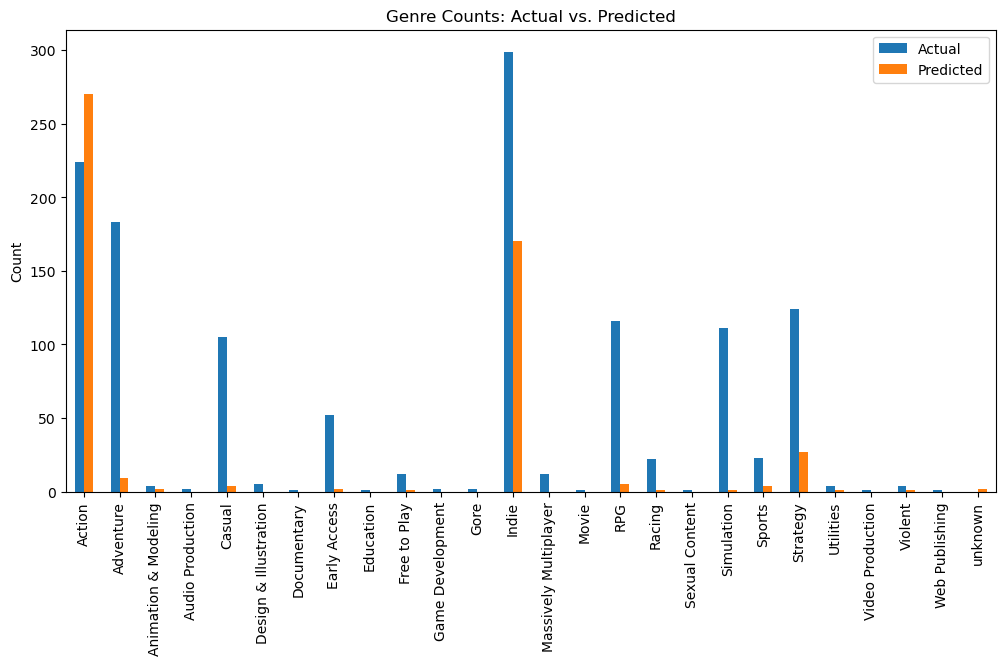

In [11]:
import matplotlib.pyplot as plt

# Count the number of each unique genre in the actual and predicted genres
actual_genre_counts = test_data['genre'].str.split(',').explode().value_counts()
predicted_genre_counts = test_data['predicted_genre'].str.split(',').explode().value_counts()

# Create a DataFrame from the genre counts
genre_counts = pd.DataFrame({
    'Actual': actual_genre_counts,
    'Predicted': predicted_genre_counts
})

# Plot the data
genre_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Genre Counts: Actual vs. Predicted')
plt.ylabel('Count')
plt.show()
